In [1]:
import pandas as pd 
from IPython.display import HTML

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,label,content
0,فناوری,گزارش های منتشر شده حاکی از آن است که کاربران ...
1,ورزشی,سوپر استار سینما و از قهرمانان سابق ووشو ــ کو...
2,حوادث,مدیرعامل شرکت عمران آب کیش از فوت یک نفر در آت...
3,فناوری,یک نوجوان انگلیسی به اتهام هک حساب‌های کاربری ...
4,سلامت,دانشمندان در جدیدترین مطالعات خود اثرات جدید و...
...,...,...
8995,حوادث,شانزدهم مهر امسال درپی تماس با مرکز فوریت‌های ...
8996,ورزشی,اتحادیه فوتبال ترینیداد و توباگو اعلام کرده تی...
8997,فرهنگی/هنری,اسامی 18 فیلم بخش مسابقه مستند ششمین دوره جشنو...
8998,حوادث,کامیونت حامل بار تخته‌های چوبی عصر دیروز چهارش...


In [3]:
from __future__ import unicode_literals
from hazm import *

normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

In [4]:
labels = train_data['label'].unique()
labels

array(['فناوری', 'ورزشی', 'حوادث', 'سلامت', 'سیاسی', 'فرهنگی/هنری'],
      dtype=object)

In [5]:
labels_frequency = train_data['label'].value_counts()
labels_frequency

فناوری         1500
ورزشی          1500
حوادث          1500
سلامت          1500
سیاسی          1500
فرهنگی/هنری    1500
Name: label, dtype: int64

<font size=4 color='#FFFFFF'> 1. Preprocessing Data<font>

<font size=2 color='#FFFFFF'> In this section we clean data by using Normalizer, Stemmer and Lemmatizer.<font>

In [6]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

<font size=2 color='#FFFFFF'> -> Normalizer is an option which replacing space with half space. <font>

In [7]:
normalizer.normalize ( 'اصلاح نویسه ها و استفاده از نیم فاصله پردازش را آسان می کند' )

'اصلاح نویسه\u200cها و استفاده از نیم فاصله پردازش را آسان می\u200cکند'

<font size=2 color='#FFFFFF'> -> Stemmer chops off letters from the end until the stem is reached <font>

In [8]:
print(stemmer.stem('آمدم'))
print(stemmer.stem('آمدی'))
print(stemmer.stem('آمدند'))
print(stemmer.stem('آمدیم'))
print(stemmer.stem('آمدید'))

آمد
آمد
آمدند
آمد
آمدید


<font size=2 color='#FFFFFF'> -> Lemmatizer is an option which gives the Bon(Maazi or Mozare) of the verbs. <font>

In [9]:
print(lemmatizer.lemmatize('خوردم'))
print(lemmatizer.lemmatize('خوردی'))
print(lemmatizer.lemmatize('خوردند'))
print(lemmatizer.lemmatize('خوردیم'))
print(lemmatizer.lemmatize('خوردید'))

خورد#خور
خورد#خور
خورد#خور
خورد#خور
خورد#خور


In [10]:
def clean_data(is_normalize, is_stem, is_lemmatize, text):
    if is_normalize:
        text = normalizer.normalize(text)
    if is_stem:
        text = map(stemmer.stem, text)
    if is_lemmatize:
        text = map(lemmatizer.lemmatize, text)
    return text

<font size=2 color='#FFFFFF'>In this function we open the text file and replace the half space to space and add ['\n' , '\r'] to file. Also lemmatize words and return it.<font>


In [11]:
def get_stop_words(file_name):
    with open(file_name, encoding="utf-8") as f:
        stop_words = [word.replace('\u200c',' ').strip() for word in f]
    stop_words.extend(['\n', '\r', '\xa0'])
    stop_words = clean_data(is_normalize=False, is_stem=False, is_lemmatize=True, text=stop_words)
    return set(stop_words)


In [12]:
stop_words = get_stop_words('stop_words.txt')
stop_words

{'مخصوصاً',
 'آسان',
 'خالصانه',
 'درحالیکه',
 'محکم تر',
 'آزادانه',
 'همچنان که',
 'طی',
 'دونستن',
 'ساله',
 'وقتی که',
 'ازاین رو',
 'واما',
 'جناح',
 'آباد',
 'جمع',
 'گو',
 'بازی کنان',
 'یکدیگر',
 'خودم',
 'هنگام',
 '؟',
 'نمی کند',
 '\ufeffو',
 'او',
 'عه',
 'عمداً',
 'بی هدف',
 'وگو',
 'وقتیکه',
 'بد',
 'خویشتن',
 'طلبکارانه',
 'ق',
 'گویا',
 'تعمدا',
 'قطعا',
 'دسته دسته',
 'گرفته',
 'خویش',
 'لذا',
 'ثانیاً',
 '\\xa0',
 'مع الاسف',
 'اینگونه',
 'مثل',
 'بردار',
 'زشتکارانند',
 'سر',
 'ش',
 'عموم',
 'همگی',
 'سالهاست',
 'به قدری',
 'خلاصه',
 'زیرچشمی',
 'گونه',
 'ایند',
 'خصوصاً',
 'نباید',
 'همواره',
 'کن',
 'عرفان',
 'برایشان',
 'به طور کلی',
 'حاضر',
 'وجود',
 'پیداست',
 'کرده',
 'امسال',
 'محتاجند',
 'مگر آن که',
 'درون',
 'علاوه برآن',
 'بتدریج',
 'تعداد',
 'داام',
 'کاملا',
 'درست',
 'بهتر',
 'حضرتعالی',
 'اکثریت',
 'هایی',
 'به خوبی',
 'به سرعت',
 'یقیناً',
 'هیچکدام',
 'چته',
 'بالاخص',
 'بعضا',
 'باز هم',
 'سعی',
 'ّه',
 'امیدوار',
 'یا',
 'داد#ده',
 'به کرات',
 'وحش

<font size=2 color='#FFFFFF'> In the preprocess function, cleaning the content of each row by repalcing the half space with space and then normalize the data. Also seprate words by using the word_tokenize and lemmatize words. And before return the data, check if word is not in stop_words.<font>

In [13]:
def preprocess(data):
    change_halfspace = data.replace('\u200c', ' ')
    normalized_data = clean_data(is_normalize=True, is_stem=False, is_lemmatize=False, text=change_halfspace)
    words = word_tokenize(normalized_data)
    words = clean_data(is_normalize=False, is_stem=False, is_lemmatize=True, text=words)
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words


In [14]:
preprocess(train_data['content'][0])

['گزارش',
 'منتشر',
 'حاکی',
 'کاربر',
 'تلگرام',
 'مناطق',
 'جهان',
 'اروپا',
 'خاورمیانه',
 'مشکل',
 'مواجه',
 'گزارش',
 'ایسنا',
 'نقل',
 'تلگرام',
 'دقایق',
 'پیام',
 'رس',
 'تلگرام',
 'صفحه',
 'دسترس',
 'کاربر',
 'اپلیکیشن',
 'اروپا',
 'خاورمیانه',
 'مشکل',
 'مواجه',
 'طبق',
 'پیام',
 'نظر',
 'رسید#رس',
 'منشا',
 'اختلالات',
 'ظهر',
 'شنبه',
 'خارج',
 'پیام',
 'رس',
 'ارتباط',
 'کشور',
 'پیام',
 'رس',
 'خصوص',
 'متخصص',
 'تلگرام',
 'متوجه',
 'اختلال',
 'بررسی',
 'برطرف',
 'مشکل',
 'مربوطه',
 'امید',
 'اختلال',
 'رفع',
 'کاربر',
 'حساب',
 'کاربر',
 'تلگرام',
 'دسترس']

<font size=4 color='#FFFFFF'> 2. Problem Process <font>

<font size=2 color='#FFFFFF'> 

Start with base formula used in Naive bayed classifier:

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$

$x$: The word detected

$c$: Lable

$P(x|c)$ : Probability of seeing word $x$ in a content of type $c$.
(Likelihood)

$P(c|x)$ : Probability of the label $c$ knowing that the word $x$ has appeared in the context. (Posterior Probability)

$P(c)$: Probability of labeling as label $c$ which is equal for all labels since they all have occured the same number of times in the dataset. (Class Prior Probability)

We don't need to calculate $P(x)$ since it's common in all probabilities, and as mentioned before $P(c)$ is equal for all labels.
Also since we may have $n$ words in the content, $X$ can be represented as $(x_1, x_2, ..., x_n)$. So the probability can be calculated as follows:

$$ P(c|x) = {P(x_1|c)P(x_2|c) ... P(x_n|c)P(c)} $$
<font>

<font size=4 color='#FFFFFF'> 2.1 Bigram<font>

<font size=2 color='#FFFFFF'> 

Using N-grams besides increasing the amount of information captured from context, might increase accuracy.


Using *Unigrams* when we consider a word by itself without paying attention to the words before/after it.

Using *Bigrams* when we consider a sequence of two adjacent elements. 

This is en example which bigrams become useful:

بعد از خوردن غذا سیر شدم.

من سیر دوست ندارم.

In the first sentence, سیر means Full but in the second example it means Garlic. Therefore, these two sentences have different concepts. First sentence translates to "I was full after eating" and the second one translates to "I don't like garlic".


<font>

In [15]:
def make_ngrams(words, n=1):
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(' '.join(words[i:i+n]))
    return ngrams

<font size=2 color='#FFFFFF'> To check the correctness of the model, we plot the words frequency for each label.<font>

In [16]:
def fit(n=1):
    total_data = {label:0 for label in labels}
    data_per_label = {}
    for index, row in train_data.iterrows():
        words = preprocess(row['content'])
        label = row['label']
        if label not in data_per_label:
            data_per_label[label] = {}
        for word in make_ngrams(words, n):
            data_per_label[label][word] = data_per_label[label].get(word, 0) + 1
            total_data[label] += 1
    return total_data, data_per_label

In [17]:
import matplotlib.pyplot as plt
from operator import itemgetter
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [18]:
def plot_frequency_of_words(data_per_label, frequency=5):
    figure, axis = plt.subplots(nrows=len(labels), ncols=1, figsize=(20, 20), constrained_layout=True)
    figure.supxlabel('Words')
    figure.supylabel('Frequency')
    for i in range(len(labels)):
        frequent = dict(sorted(data_per_label[labels[i]].items(), key=itemgetter(1), reverse=True)[:frequency])
        keys = frequent.keys()
        values = frequent.values()
        axis[i].bar([get_display(reshape(key)) for key in keys], values)
        axis[i].set_title(get_display(reshape(labels[i])))
    plt.show()

<u>total_data</u> is storing number of words in each label.

<u>data_per_label</u> is storing number of occurence of word x in each label.



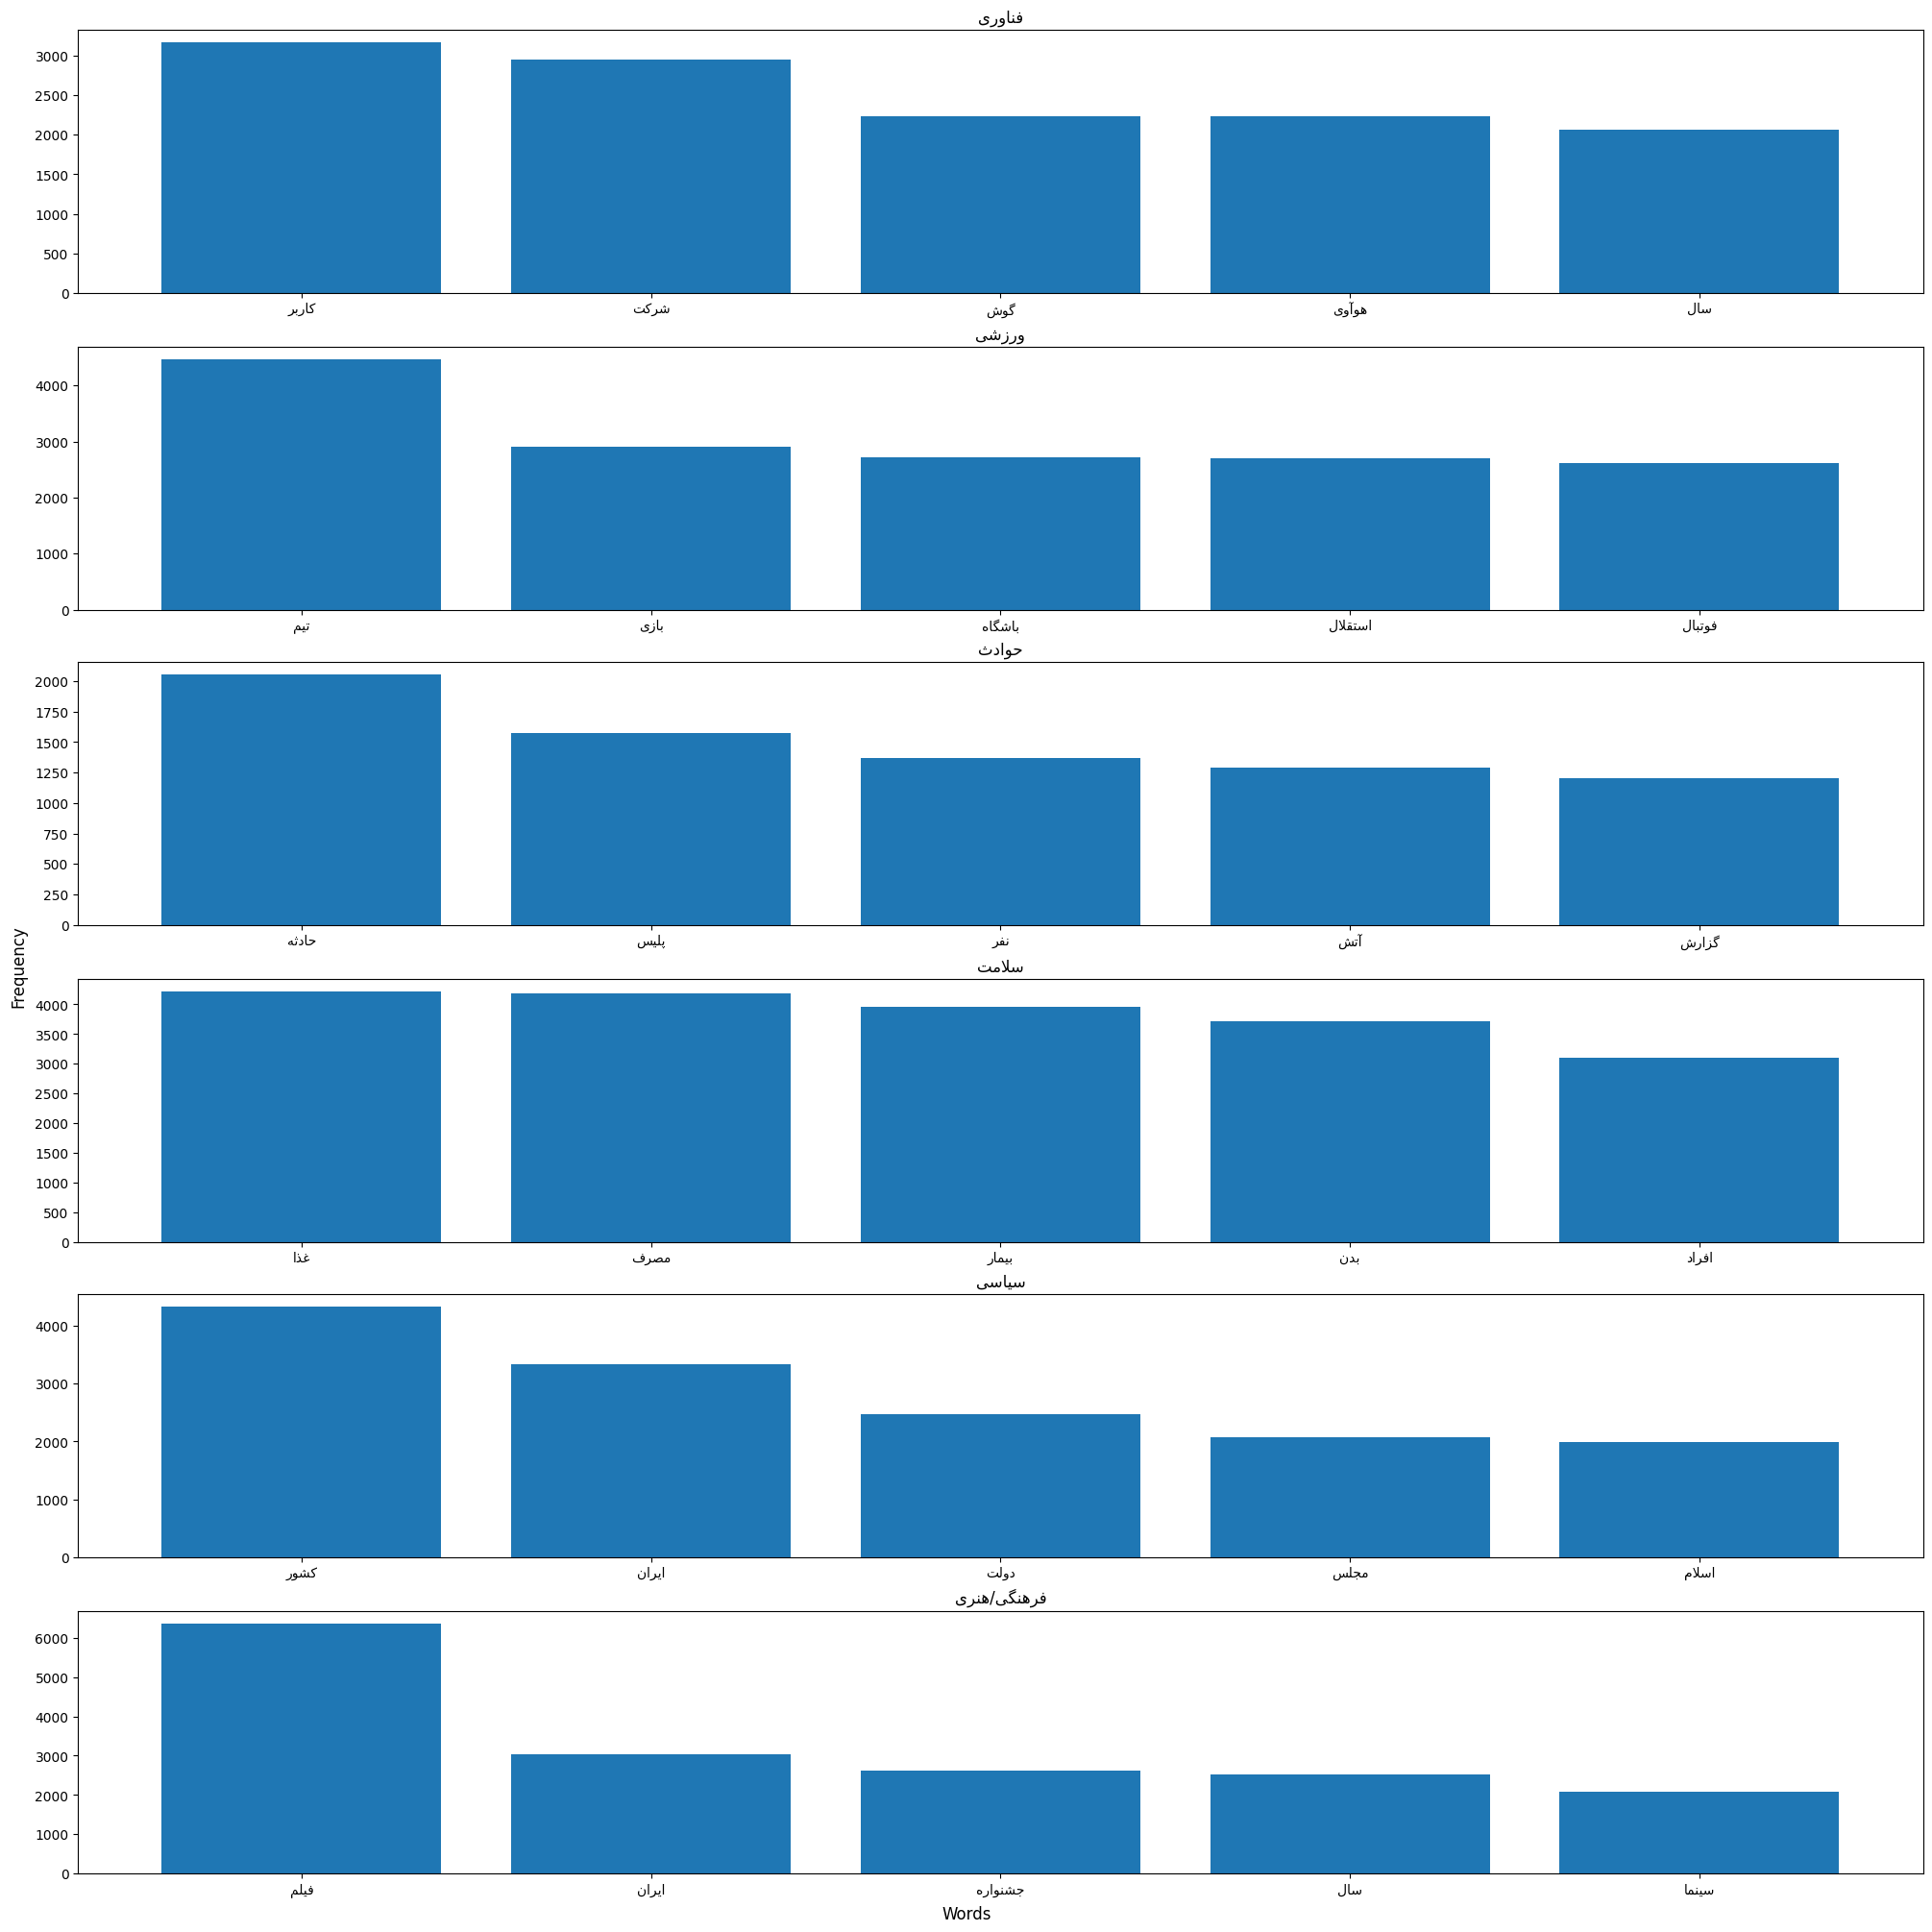

In [19]:
model = fit()
model = {'total_data': model[0], 'data_per_label': model[1]}
plot_frequency_of_words(model['data_per_label'])

In [20]:
stop_words.update(['سال', 'ایران', 'کشور', 'گوش', 'ایسنا','دست', 'کار', 'قرار', 'گزارش'])

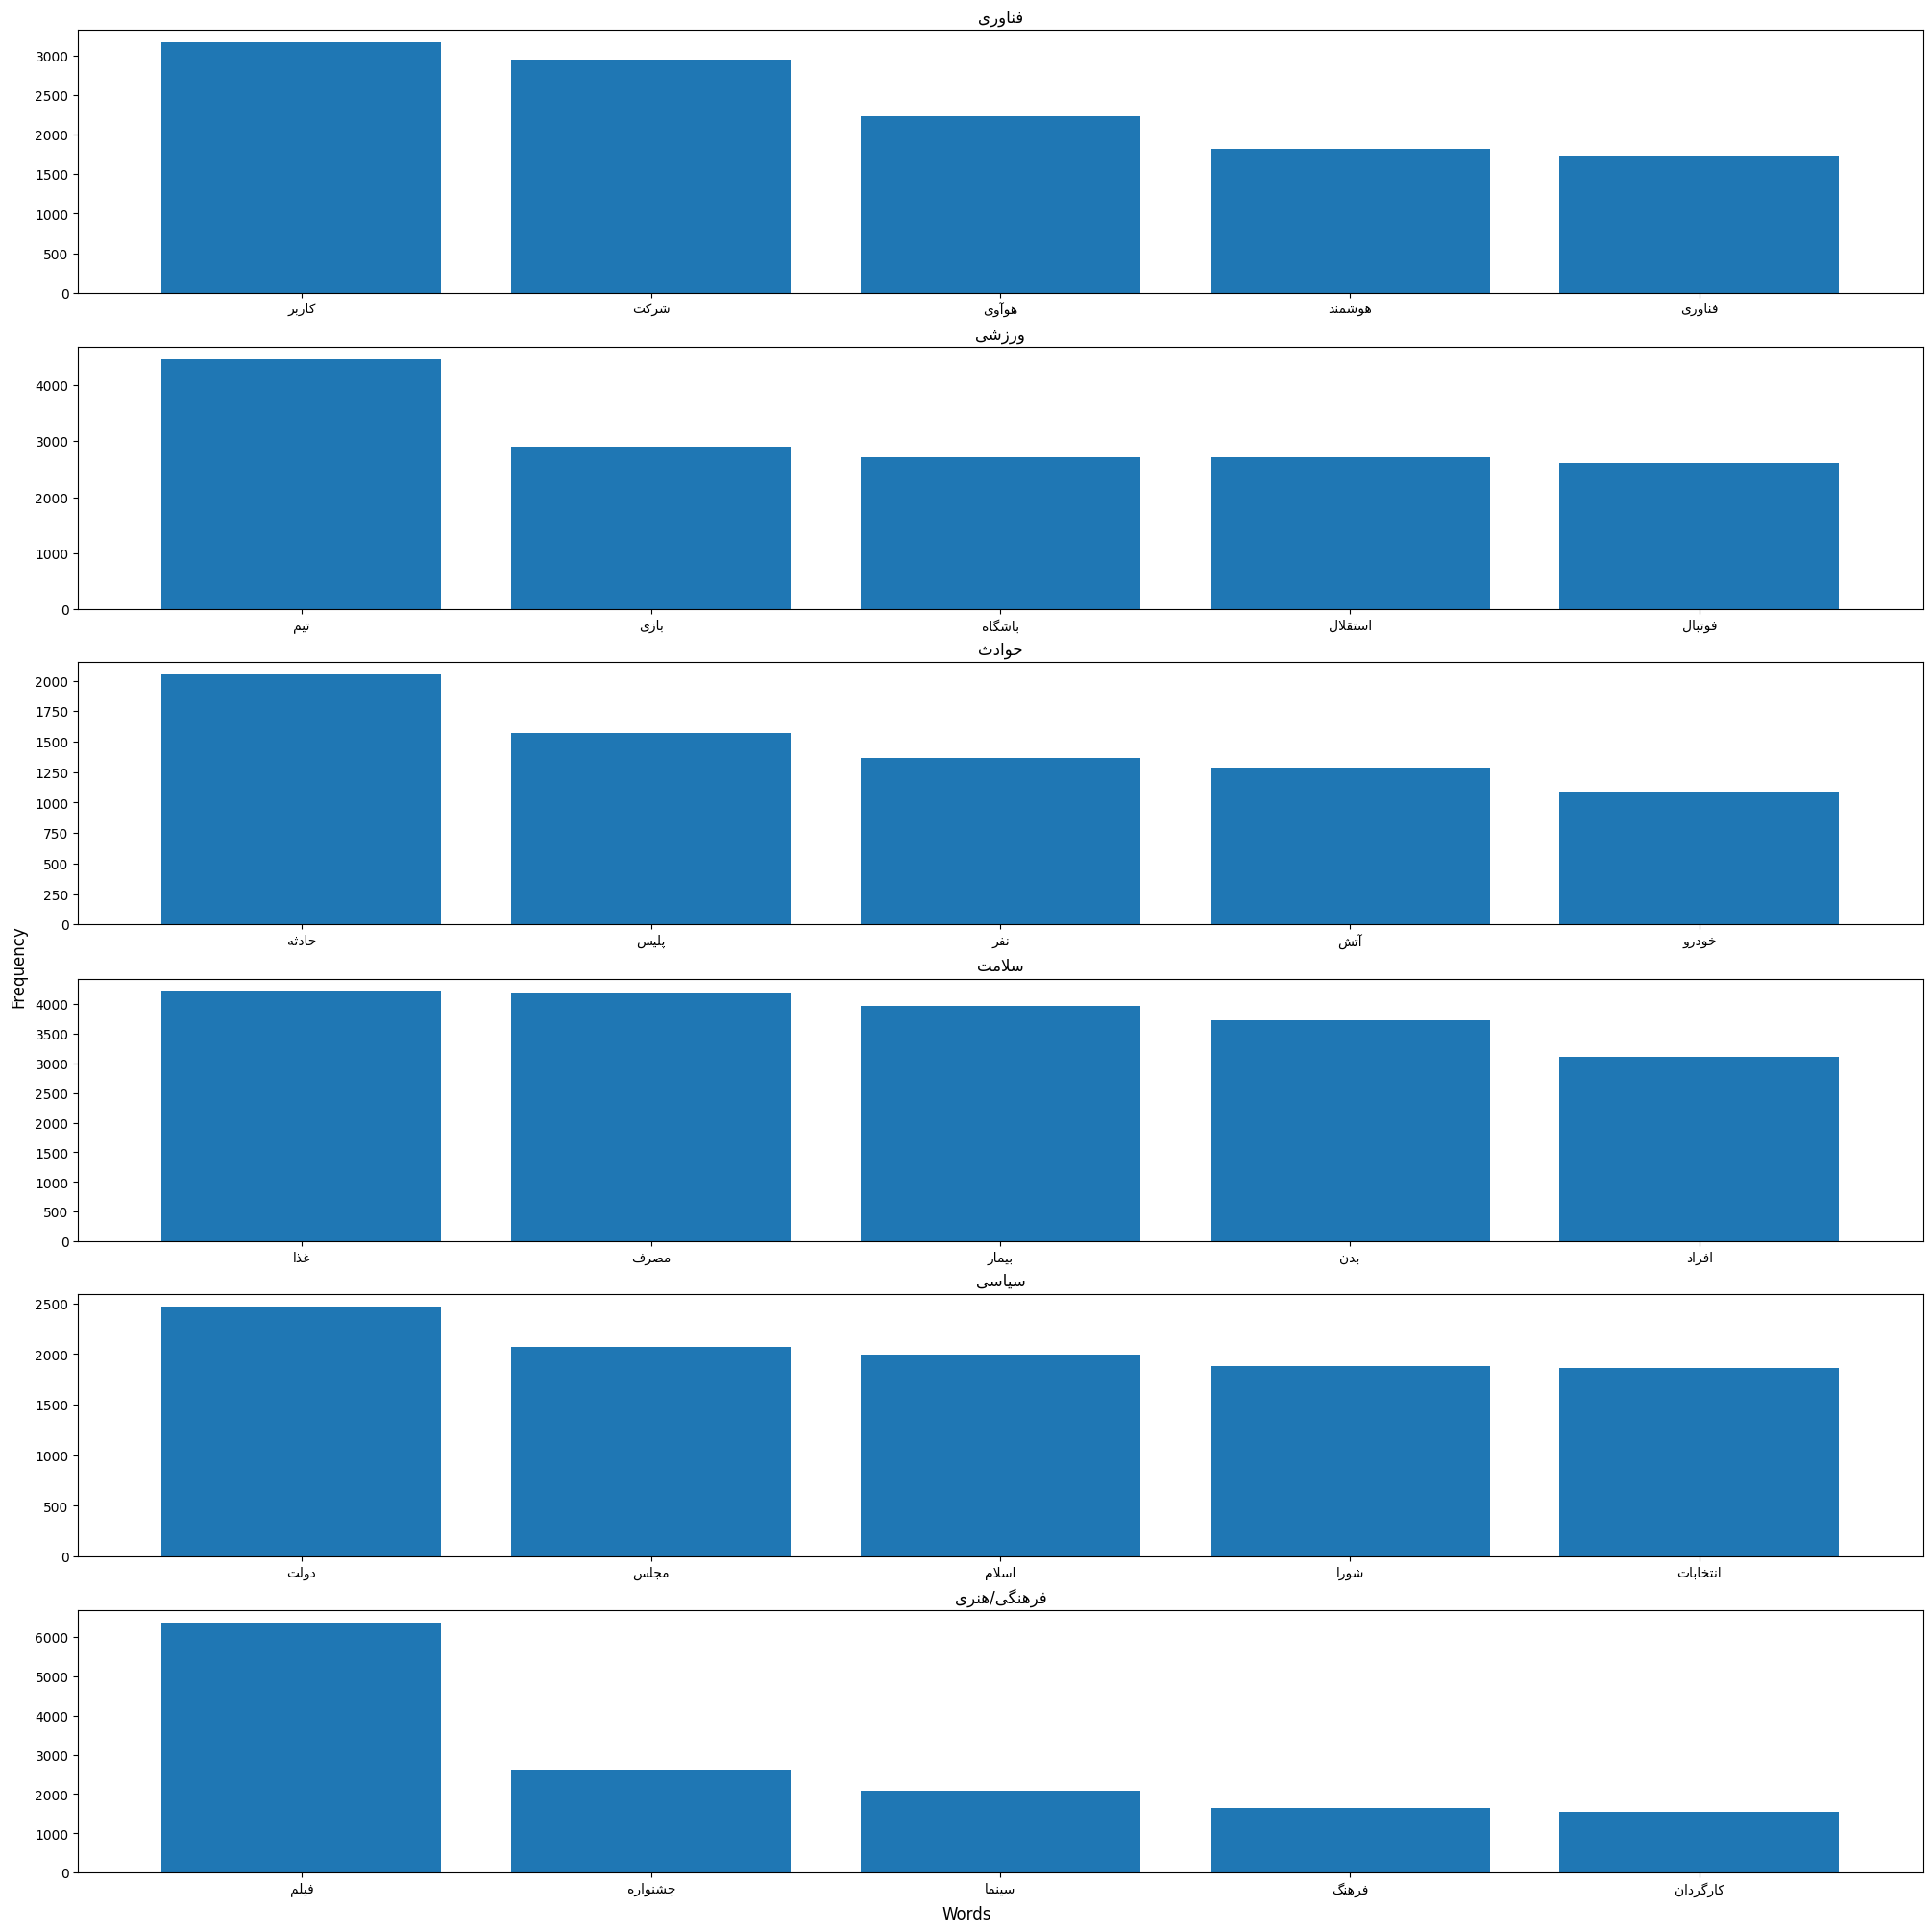

In [21]:
model = fit()
model = {'total_data': model[0], 'data_per_label': model[1]}
plot_frequency_of_words(model['data_per_label'])

<font size=4 color='#FFFFFF'> 2.2 Additive Smoothing<font>

<font size=2 color='#FFFFFF'>
If a word contains only one type of label, Naive Bayes will definitely choose that label as the answer, which might be wrong in some cases.

When word $x$ doesn't appeared in Label $c$, $P(x|c) = 0$ which will result in $P(c|x) = 0$ and the Label won't be chosen as the answer because $log(0) = - \infty$ so the $ sum_{i=1}^{n} log(P(x_i | c)) $ will converge to $- \infty$ and never will be chosen as the Label. Using *Additive Smoothing* is a solution which associate the probability as follows:

$$ \frac{Word Count + \alpha}{Total Words + \alpha.D} $$

where $D$ is the number of distinct words in that category and $\alpha$ is the degree of smoothing. $\alpha = 0$ when we don't need it which associate the probability as follows:

$$ \frac{Word Count}{Total Words}$$

This will avoid the $- \infty$ since the fraction will never be equal to 0.
<font>

In [22]:
import numpy as np

In [23]:
def calculate_score(data_per_label, total_data, ngrams, unique_ngrams, label, alpha):
    score = 0
    ZERO = (10)**(-100)
    for ngram in ngrams:
        if not ngram in data_per_label[label] and alpha == 0:
            score += np.log(ZERO)
        else:
            score += np.log((data_per_label[label].get(ngram, 0) + alpha) / (total_data[label] + alpha * len(unique_ngrams)))
    score += np.log(labels_frequency[label]/np.sum(labels_frequency))
    return score

In [24]:
def unique_words(ngrams):
    unique = list()
    for ngram in ngrams:
        if ngram not in unique:
            unique.append(ngram)
    return unique

In [25]:
def prediction(model, data, n=1, alpha=0):
    data_per_label = model['data_per_label']
    total_data = model['total_data']
    predictions = []
    for index, row in data.iterrows():
        words = preprocess(row['content'])
        ngrams = make_ngrams(words, n)
        unique_ngrams = unique_words(ngrams)
        max_score = -np.inf
        max_label = None
        for label in labels:
            scores = {label:calculate_score(data_per_label, total_data, ngrams, unique_ngrams, label, alpha)}
            if max(scores.values()) > max_score:
                max_score = max(scores.values())
                max_label = max(scores, key=scores.get)
        predictions.append(max_label)
    data['predicted_label'] = predictions
    
    return data

In [26]:
predicted = test_data
predicted = prediction(model, predicted)
predicted

,label,content,predicted_label
0,فناوری,بعد از اعلام لیست ۲۳ شرکت مجاز ثبت سفارش و ارا...,فناوری
1,فرهنگی/هنری,یک استاد علم قرائت قرآن کریم، گفت: ریشه موسیقی...,فرهنگی/هنری
2,حوادث,آتش سوزی های زنجیره ای جنگل های زاگرس در استان...,حوادث
3,فناوری,استفاده از سرویس‌های iMassage یا Facetime محصو...,فناوری
4,حوادث,دادستان عمومی و انقلاب یاسوج گفت: 10 میلیون دل...,حوادث
...,...,...,...
1110,ورزشی,عضو هیات مدیره باشگاه استقلال گفت:من هیچوقت به...,ورزشی
1111,حوادث,مدیر آموزش و پرورش شهرستان جیرفت از دستگیری دا...,فرهنگی/هنری
1112,سیاسی,رییس جمهور با بیان اینکه در هفته گذشته هیچ شهر...,سیاسی
1113,فناوری,دارندگان مدل‌های اعلام‌شده گوشی‌های هوآوی، می‌...,فناوری


<font size=4 color='#FFFFFF'> 3. Evaluation<font>

<font size=2 color='#FFFFFF'> 

3.1 Consider the classifier will always predicts a specific class like "سیاسی" for a Label, the recall value for this specific class "سیاسی" will be 100% which definitely is not good! On the other hand, if we don't have enough predictions(e.g 2), the probability of making mistake in predictions would be so low because we made only 2 predictions. So the precision may lead to 100%.

3.2 F1 Score is the harmonic mean of Precision and Recall. F1 is usually more useful than accuracy, especially if there's a big difference between Precision and Recall. If false positives and false negatives have similar cost, Accuracy works better.

$$F_{1} = 2\frac{Precision.Recall}{Precision + Recall} = \frac{TP}{TP + \frac{FP + FN}{2}}$$

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$
<font>

<font size=1 color='#FFFFFF'> *P.S.* *TP* : *true positive*, *FP* : *false positive*, *FN* : *false negative* <font>

<font size=2 color='#FFFFFF'>

3.3 Multi-Class Metrics

**Micro**: Calculates F1 by value total true positives, false negatives and false positives. Prediction for each label in the dataset doesn't matter.

$$Micro-F1 = \frac{CorrectDetected}{AllDetected}$$

**Macro**: Calculates F1 for each label, and returns the average without considering the proportion for each label in the dataset.

$$Macro-F1 = \frac{F1_1 + F1_2 + ... + F1_n}{n}$$

When averaging the macro-F1, we gave equal weights to each class. We don’t have to do that: in weighted-F1, we weight the F1-score of each class by the number of samples from that class. 

**Weighted**: Calculates F1 for each label, and returns the average considering the proportion for each label in the dataset.

$$Weighted-F1 = {P(C_1)F1_1+ ... + P(C_n)F1_n}$$
<font>

In [27]:
def calculate(predicted):
    rows_name = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'Macro Avg', 'Micro Avg', 'Weighted Avg']
    cols_name = np.append(labels,'All Classes')
    probability_table = pd.DataFrame(index=rows_name, columns=cols_name)
    F1 = {label: 0 for label in labels}
    weighted_avg = 0
    for label in labels:
        total_class = 0
        correct_detected_class = 0
        all_detected_class = 0
        for index, row in predicted.iterrows():
            if row['label'] == label:
                total_class += 1
            if row['label'] == label and row['predicted_label'] == label:
                correct_detected_class += 1
            if row['predicted_label'] == label:
                all_detected_class += 1

        precision = correct_detected_class / all_detected_class
        recall = correct_detected_class / total_class
        F1[label] = (2 * precision * recall) / (precision + recall)
        
        weighted_avg += total_class / len(predicted) * F1[label]

        probability_table[label]['Precision'] = precision * 100
        probability_table[label]['Recall'] = recall * 100
        probability_table[label]['F1-score'] = F1[label] * 100
        
    total_corrected = predicted[predicted['label'] == predicted['predicted_label']]
    probability_table['All Classes']['Accuracy'] = len(total_corrected) / len(predicted) * 100
    probability_table['All Classes']['Macro Avg'] = np.mean(list(F1.values())) * 100
    probability_table['All Classes']['Micro Avg'] = probability_table['All Classes']['Accuracy']
    probability_table['All Classes']['Weighted Avg'] = weighted_avg * 100
    probability_table.fillna('-', inplace=True)
    return probability_table

In [28]:
with_out_smoothing = prediction(model, test_data, n=1, alpha=0)
calculate(with_out_smoothing)

,فناوری,ورزشی,حوادث,سلامت,سیاسی,فرهنگی/هنری,All Classes
Precision,91.411043,98.235294,93.939394,94.674556,80.092593,70.258621,-
Recall,88.690476,87.894737,77.5,90.39548,86.5,90.555556,-
F1-score,90.030211,92.777778,84.931507,92.485549,83.173077,79.126214,-
Accuracy,-,-,-,-,-,-,86.726457
Macro Avg,-,-,-,-,-,-,87.087389
Micro Avg,-,-,-,-,-,-,86.726457
Weighted Avg,-,-,-,-,-,-,86.983346


In [29]:
with_smoothing = prediction(model, test_data, n=1, alpha=1)
calculate(with_smoothing)

,فناوری,ورزشی,حوادث,سلامت,سیاسی,فرهنگی/هنری,All Classes
Precision,95.679012,99.459459,89.814815,97.109827,90.0,95.266272,-
Recall,92.261905,96.842105,97.0,94.915254,94.5,89.444444,-
F1-score,93.939394,98.133333,93.269231,96.0,92.195122,92.26361,-
Accuracy,-,-,-,-,-,-,94.26009
Macro Avg,-,-,-,-,-,-,94.300115
Micro Avg,-,-,-,-,-,-,94.26009
Weighted Avg,-,-,-,-,-,-,94.277553


In [30]:
bigram_model = fit(n=2)
bigram_model = {'total_data': bigram_model[0], 'data_per_label': bigram_model[1]}
with_bigram = prediction(bigram_model, test_data, n=2, alpha=0)
calculate(with_bigram)

,فناوری,ورزشی,حوادث,سلامت,سیاسی,فرهنگی/هنری,All Classes
Precision,94.767442,97.87234,95.918367,95.530726,91.469194,95.266272,-
Recall,97.02381,96.842105,94.0,96.610169,96.5,89.444444,-
F1-score,95.882353,97.354497,94.949495,96.067416,93.917275,92.26361,-
Accuracy,-,-,-,-,-,-,95.067265
Macro Avg,-,-,-,-,-,-,95.072441
Micro Avg,-,-,-,-,-,-,95.067265
Weighted Avg,-,-,-,-,-,-,95.058589


<font size=2 color='#FFFFFF'>
As we see, using "Additive smoothing" has improved the estimation. <font>

In [31]:
wrong_predicted = predicted[predicted['label'] != predicted['predicted_label']]
wrong_predicted

,label,content,predicted_label
30,فرهنگی/هنری,- چهارشنبه اول تیر 1401 اتفاق نادر و جالبی رخ ...,سیاسی
45,فرهنگی/هنری,اعتراض گسترده کاربران توییتر به اظهارات وزیر ا...,فناوری
65,حوادث,ملی‌پوش سابق دوچرخه سواری ایران به علت تصادف د...,ورزشی
85,فرهنگی/هنری,- روز گذشته در حاشیه معرفی ساپینتو سر مربی باش...,ورزشی
88,سلامت,وزیر بهداشت، طی نامه‌ای به معاون بهداشت این وز...,سیاسی
114,حوادث,کانون اصلی این زلزله در شمال شرق ایالت ویکتوری...,فناوری
141,فرهنگی/هنری,عصرخبر,فناوری
143,فناوری,در بحبوحه افزایش درخواست‌ها برای حذف تایم لاین...,سیاسی
149,فرهنگی/هنری,- دربارۀ 12 اردیبهشت ، روز معلم و سال‌روز ترور...,سیاسی
173,فرهنگی/هنری,رایج بلیت های خود را کمتر از یک دلار افزایش دا...,فناوری


<font size=2 color='#FFFFFF'> As we see content of the news is having words such as 'سازمان بهداشت جهانی','سرطان', 'بیماران and 'آزمایشات' which are mistaken with words in 'سلامت' Label. <font>

In [32]:
wrong_predicted[-1:]['content'].values[0]

'به گزارش ایسنا و به نقل از سی نت، کنفرانس سالیانه گوگل(Google I/O ۲۰۱۹) که در آن از جدیدترین دستاوردهای نرم افزاری خود پرده برداری کرد شب گذشته (۹:۳۰ شب به وقت تهران) آغاز شد. گوگل طی "کنفرانس آ/او" (I / O) ۲۰۱۹ اعلام کرد که می\u200cخواهد فناوری هوش مصنوعی خود را برای تشخیص زود هنگام سرطان مورد استفاده قرار دهد. دکتر "لیلی پنگ" (Lily Peng) طی این کنفرانس گفت: فناوری این شرکت می\u200cتواند به دانشمندان برای تشخیص علائم اولیه سرطان کمک کند. طبق گزارش "سازمان بهداشت جهانی"، سرطان ریه شایع\u200cترین دلیل مرگ و میر مربوط به سرطان در بین زنان و مردان به\u200cشمار می\u200cرود و سالانه بیش از ۲ میلیون نفر در جهان به آن مبتلا می\u200cشوند. پنگ در ادامه افزود: در بیش از ۸۰ درصد موارد ما نمی\u200cتوانیم علائم اولیه سرطان را در بیماران مبتلا به سرطان ریه تشخیص دهیم اما اکنون هوش مصنوعی به کمک ما آمده است و توسط آن می\u200cتوانیم از مرگ زودرس افراد جلوگیری کنیم. \xa0 تشخیص علائم اولیه سرطان توسط سی\u200c.تی اسکن بسیار سخت است و سی\u200cتی اسکن تنها می\u200cتواند علائم سرطان بیمارانی که مدتی از سرط